In [1]:
import pandas, copy

from tqdm import tqdm

pandas.options.display.max_columns=999

In [39]:
cog=pandas.read_csv('../create-coguk-dataset/cog_dataset-20210624.csv.gz')
cog[:3]

/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cogid,sequence_name,cog_country,adm1,is_pillar_2,sample_date,epi_week,lineage,lineages_version,lineage_conflict,lineage_ambiguity_score,scorpio_call,scorpio_support,scorpio_conflict,t1001i,n501y,d614g,del_21765_6,y453f,del_1605_3,a222v,n439k,mutations,p681h,q27stop,e484k,p323l,study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,instrument_platform,ena_country,submitted_ftp,read_count,base_count
0,PHWC-PYFPIR,Wales/PHWC-PYFPIR/2021,UK,UK-WLS,N,2021-05-19,73,None,PANGO-v1.2.13,NaN,NaN,NaN,NaN,NaN,I,Y,G,del,Y,ref,A,N,synSNP:C913T|synSNP:C1288T|synSNP:C3037T|orf1a...,H,*,E,L,PRJEB37886,SAMEA9132940,ERS6847341,ERX5658438,ERR6019078,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR601/ERR6019078/P...,96557.0,13320734.0
1,HSLL-160F062,England/HSLL-160F062/2021,UK,UK-ENG,Y,2021-06-03,75,B.1.617.2,PLEARN-v1.2.13,NaN,NaN,Delta (B.1.617.2-like),1.0,0.0,T,N,G,ref,Y,ref,A,N,synSNP:C3037T|orf1ab:A1306S|orf1ab:P2046L|orf1...,R,Q,E,L,PRJEB37886,SAMEA9148402,ERS6873131,ERX5686029,ERR6047046,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR604/ERR6047046/H...,3430083.0,721453740.0
2,QEUH-160DE00,Scotland/QEUH-160DE00/2021,UK,UK-SCT,Y,2021-06-03,75,B.1.617.2,PLEARN-v1.2.13,NaN,NaN,Delta (B.1.617.2-like),1.0,0.0,T,N,G,X,Y,ref,A,N,orf1ab:S443F|synSNP:C3037T|orf1ab:A1306S|synSN...,R,Q,E,L,PRJEB37886,SAMEA9202513,ERS6927129,ERX5695457,ERR6056590,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR605/ERR6056590/Q...,1343069.0,282390969.0


In [40]:
cog_mar18=cog.loc[cog.sample_date=='2021-03-18']
cog_mar18.set_index('cogid',inplace=True,verify_integrity=True)
cog_mar18[:3]

,sequence_name,cog_country,adm1,is_pillar_2,sample_date,epi_week,lineage,lineages_version,lineage_conflict,lineage_ambiguity_score,scorpio_call,scorpio_support,scorpio_conflict,t1001i,n501y,d614g,del_21765_6,y453f,del_1605_3,a222v,n439k,mutations,p681h,q27stop,e484k,p323l,study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,instrument_platform,ena_country,submitted_ftp,read_count,base_count
cogid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BHRT-24BB617,England/BHRT-24BB617/2021,UK,UK-ENG,Y,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7826,0.1304,I,Y,G,del,Y,ref,A,N,orf1ab:H110Y|synSNP:C913T|synSNP:C3037T|orf1ab...,H,*,E,L,PRJEB37886,SAMEA9084565,ERS6812861,ERX5631365,ERR5990608,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR599/ERR5990608/B...,2283554.0,324514526.0
PHWC-PYREIM,Wales/PHWC-PYREIM/2021,UK,UK-WLS,N,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7826,0.1304,I,Y,G,del,Y,ref,A,N,synSNP:C913T|synSNP:C3037T|orf1ab:T1001I|synSN...,H,*,E,L,PRJEB37886,SAMEA8685016,ERS6369522,ERX5518105,ERR5874574,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR587/ERR5874574/P...,581018.0,79599495.0
PHWC-PYREWP,Wales/PHWC-PYREWP/2021,UK,UK-WLS,N,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7826,0.1304,I,Y,G,del,Y,ref,A,N,synSNP:C913T|orf1ab:L730F|synSNP:C3037T|orf1ab...,H,*,E,L,PRJEB37886,SAMEA8685119,ERS6369625,ERX5518208,ERR5874678,ILLUMINA,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR587/ERR5874678/P...,528677.0,72454474.0


In [41]:
len(cog_mar18)

2107

In [42]:
cog_mar18.lineage.value_counts()

B.1.1.7      2069
B.1.177         6
B.1.36.31       5
C.36.3          4
B.1.351.3       4
B.1.351         4
B.1.525         3
A.29            3
B.1.617.2       2
B.1.617.1       1
B.1.153         1
XA              1
C.36            1
B.1.1           1
B.1.36          1
P.1             1
Name: lineage, dtype: int64

In [43]:
cog_mar18.instrument_platform.value_counts()

ILLUMINA           2013
OXFORD_NANOPORE      94
Name: instrument_platform, dtype: int64

In [44]:
cog_mar18['bucket']='demo_samples'

<ipython-input-44-e6c090991e6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cog_mar18['bucket']='demo_samples'


In [45]:
df=copy.deepcopy(cog_mar18.loc[(cog_mar18.instrument_platform=='OXFORD_NANOPORE')])
df.to_csv('cog-testset-18March2021-'+str(len(df))+'samples-nanopore.csv.gz')
df[['bucket','run_accession']].to_csv('sp3-testset-18March2021-'+str(len(df))+'samples-nanopore.csv')
len(df)

94

In [46]:
df=copy.deepcopy(cog_mar18.loc[(cog_mar18.instrument_platform=='ILLUMINA')])
df.to_csv('cog-testset-18March2021-'+str(len(df))+'samples-illumina.csv.gz')
df[['bucket','run_accession']].to_csv('sp3-testset-18March2021-'+str(len(df))+'samples-illumina.csv')
len(df)

2013

<AxesSubplot:>

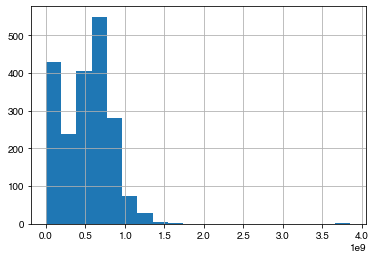

In [80]:
df=copy.deepcopy(cog_mar18.loc[(cog_mar18.instrument_platform=='ILLUMINA')])
df.base_count.hist(bins=20)

In [81]:
subset=df.loc[(df.base_count>5e8) & (df.base_count<1e9)]
subset=subset.sample(n=48)
delta_samples=copy.deepcopy(df.loc[df.lineage=='B.1.617.2'])
df=pandas.concat([delta_samples,subset])
df.to_csv('cog-testset-18March2021-'+str(len(df))+'samples-illumina.csv.gz')
df[['bucket','run_accession']].to_csv('sp3-testset-18March2021-'+str(len(df))+'samples-illumina.csv')

<AxesSubplot:>

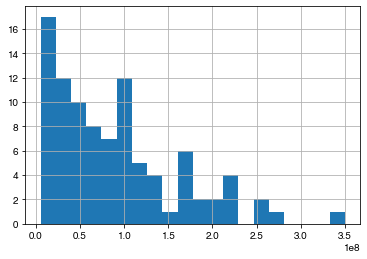

In [82]:
df=copy.deepcopy(cog_mar18.loc[(cog_mar18.instrument_platform=='OXFORD_NANOPORE')])
df.base_count.hist(bins=20)

In [83]:
subset=df.loc[(df.base_count>3e7) & (df.base_count<1.5e8)]
df=subset.sample(n=50)
df.to_csv('cog-testset-18March2021-'+str(len(df))+'samples-nanopore.csv.gz')
df[['bucket','run_accession']].to_csv('sp3-testset-18March2021-'+str(len(df))+'samples-nanopore.csv')

In [84]:
df[:3]


,sequence_name,cog_country,adm1,is_pillar_2,sample_date,epi_week,lineage,lineages_version,lineage_conflict,lineage_ambiguity_score,scorpio_call,scorpio_support,scorpio_conflict,t1001i,n501y,d614g,del_21765_6,y453f,del_1605_3,a222v,n439k,mutations,p681h,q27stop,e484k,p323l,study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,instrument_platform,ena_country,submitted_ftp,read_count,base_count,bucket
cogid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BIRM-BCN48G,England/BIRM-BCN48G/2021,UK,UK-ENG,N,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7391,0.1304,I,Y,G,del,Y,ref,A,N,synSNP:T283C|synSNP:C913T|synSNP:T2698C|synSNP...,H,*,E,L,PRJEB37886,SAMEA8519200,SRS8929888,ERX5385182,ERR5669688,OXFORD_NANOPORE,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR566/ERR5669688/B...,192938.0,97993667.0,demo_samples
NORT-1BA6E13,England/NORT-1BA6E13/2021,UK,UK-ENG,Y,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7826,0.1304,I,Y,G,del,Y,ref,A,N,synSNP:C913T|synSNP:C920T|orf1ab:I880V|synSNP:...,H,*,E,L,PRJEB37886,SAMEA8467506,ERS6152346,ERX5349712,ERR5633187,OXFORD_NANOPORE,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR563/ERR5633187/N...,207871.0,80979396.0,demo_samples
BIRM-BCN4GE,England/BIRM-BCN4GE/2021,UK,UK-ENG,N,2021-03-18,64,B.1.1.7,PLEARN-v1.2.13,NaN,NaN,Alpha (B.1.1.7-like),0.7826,0.1304,I,Y,G,del,Y,ref,A,N,synSNP:C913T|synSNP:T2698C|synSNP:C3037T|orf1a...,H,*,E,L,PRJEB37886,SAMEA8518534,SRS8947971,ERX5384507,ERR5669013,OXFORD_NANOPORE,United Kingdom,ftp.sra.ebi.ac.uk/vol1/run/ERR566/ERR5669013/B...,120024.0,60809070.0,demo_samples
